# Case Study: How Does a Bike-Share Navigate Speedy Success?

Author: Ageng Nurkhoyri

Date: 12 March 2025

This case study is the Capstone Project of **Google Data Analytics Professional Certificate**. The **6 steps of Data Analysis** is used to present this analysis.

# STEP 1. ASK

#### 1. Background
In 2016, Cyclistic launched a successful bike-share oering. Since then, the program has grown to a eet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the exibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s nance analysts have concluded that annual members are much more protable than casual riders. Although the pricing exibility helps Cyclistic aract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a solid opportunity to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

#### 2. Business Question
So here are the analysis questions that will help in the analysis:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. What are the causes that drive casual riders to buy Cyclistic annual memberships?
3. How can Cyclistic use digital media as a tool to convert casual riders to members?

For this case, Lily Moreno who is the director of marketing has assigned me as a junior data analyst to the first question: How do annual members and casual riders use Cyclistic bikes differently?

#### 3. Business Task
To better understand how annual members and casual riders differ for designing a marketing strategies aimed at converting casual riders into annual members.

#### 4. Stakeholders
1. Lily Moreno: The director of marketing and my manager.
2. Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
3. Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# STEP 2. PREPARE

#### 1. Data
Based on ask phase, we will use Cyclistic’s historical trip data to analyze and identify trends. The data that we will be using is data that collected in 2024 from January until December. 

#### 2. ROCCC Check
A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.
1. Reliable - MED - The dataset contains a significant number of null values in the station name columns
2. Original - HIGH - The dataset is first-party data, directly collected from Cyclistic’s bike-sharing system.
3. Comprehensive - MED - Certain external factors, such as weather conditions, user demographics, or special events, are not included, which could limit deeper insights into user behavior. 
4. Current - HIGH - The data covers the most recent 12-month period, making it relatively up-to-date.
5. Cited - HIGH - The dataset is well-documented and publicly available through a trusted source. 

Overall, the dataset is considered good quality data and can be used to produce business recommendation based on this data. 

# STEP 3. PROCESS

We are using Python to process and analyze the data.

#### 1. Preparing the Environment
We will use **os**, **pandas**, **matplotlib**, and **seaborn** for this case study.

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Import Dataset
All the data will be imported and merged into a single dataframe **df**.

In [25]:
folder_path = "data/raw"

all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]  
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]  
df = pd.concat(df_list, ignore_index=True)  
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


Check merged data dimension.

In [26]:
df.shape

(5860568, 13)

#### 3. Data Cleaning and Manipulation
In this step we will:
1. Check and Observe the merged data.
2. Remove any duplicates, typo, etc.
3. Check if there are null value and fix it.
4. Transform data for easier analysis step.

Check data type using dtypes function.

In [27]:
print(df.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


We can see that column `started_at` and `ended_at` have the data type `object`. We need to convert them to `datetime` to facilitate data transformation and analysis. We can use `pd.to_datetime` to convert the date type to `datetime`.

In [28]:
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


Now let's check again the date types.

In [29]:
print(df.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object


After that, we will check if there are missing value from the dataset.

In [30]:
df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

As can be seen, column `start_station_name`, `start_station_id`, `end_station_name`, `end_station_name` have a lot of missing value. For this case study, i will ignore it cause i can't find the method to fill those missing value using the latitude and longitude data. I already tried using `geopy` and it takes to long to process.

After checking missing value, now let's check if there are duplicate row. 

In [31]:
print(df.duplicated().sum())

0


Now we start transforming the data, first we will create a new column called `ride_length` that has the total time it takes for a ride. we can get `ride_length` by substracting column `ended_at` by `started_at`

In [32]:
df['ride_length'] = df['ended_at'] - df['started_at']
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,0 days 00:07:32
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,0 days 00:07:13
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,0 days 00:08:00
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,0 days 00:29:49
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,0 days 00:26:12


Let's check if we have the right `ride_length`, a normal `ride_length` cannot be a negative value.

In [33]:
min_ride_length = df["ride_length"].min()
max_ride_length = df["ride_length"].max()

print("Ride Length Minimum:", min_ride_length)
print("Ride Length Maximum:", max_ride_length)

Ride Length Minimum: -2 days +02:11:41
Ride Length Maximum: 1 days 01:59:56


We need to remove the rows that have negative value `ride_length`. A `ride_length` value more that was more than one day is also a bit strange, but let's just leave it for now.

In [34]:
df = df[df["ride_length"] > pd.Timedelta(0)]

In [35]:
min_ride_length = df["ride_length"].min()
max_ride_length = df["ride_length"].max()

print("Ride Length Minimum:", min_ride_length)
print("Ride Length Maximum:", max_ride_length)

Ride Length Minimum: 0 days 00:00:00.039000
Ride Length Maximum: 1 days 01:59:56


Now we don't have negative `ride_length` anymore (even though `ride_length` in millisecond kinda sus). Now we need to create another column called `day_of_week` to specify which day user have a ride. This column will make analyzing data easier.

In [36]:
df['day_of_week'] = df['started_at'].dt.strftime('%A')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,0 days 00:07:32,Friday
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,0 days 00:07:13,Monday
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,0 days 00:08:00,Saturday
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,0 days 00:29:49,Monday
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,0 days 00:26:12,Wednesday


I think that's all that needed for cleaning and manipulation, now let's move to next step which is analyze data.

# STEP 4. ANALYZE & VISUALIZE

We will combine this 2 step cause i dont use other visualization tools as Power BI or Tableau. 

#### 1. Average Ride Length
The first analyze we gonna do is comparing average `ride_length` beetwen member and casual riders. This step will help us know riding pattern for casual and member.

In [37]:
df.groupby("member_casual")["ride_length"].mean()

member_casual
casual   0 days 00:25:09.268399049
member   0 days 00:12:46.412902277
Name: ride_length, dtype: timedelta64[ns]

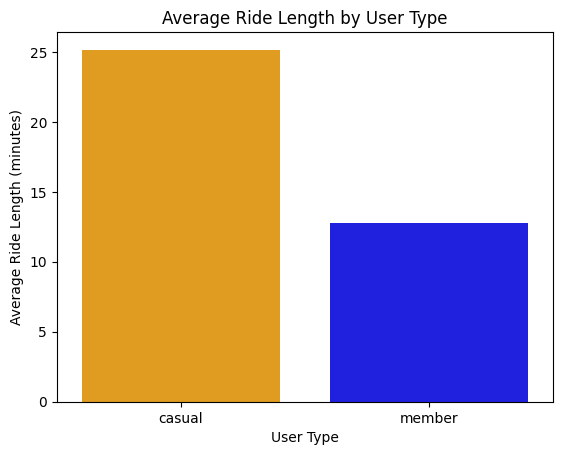

In [38]:
avg_ride_length = df.groupby("member_casual")["ride_length"].mean().dt.total_seconds() / 60

sns.barplot(x=avg_ride_length.index, y=avg_ride_length.values, hue= avg_ride_length.index, palette={"casual": "orange", "member": "blue"}, legend=False)

plt.ylabel("Average Ride Length (minutes)")
plt.xlabel("User Type")
plt.title("Average Ride Length by User Type")
plt.show()

The analysis shows that casual riders have a longer average ride duration (≈25 minutes) compared to members (≈12 minutes). This can be explained by the differences in membership types:
- Casual riders (Single Ride & 1-Day Pass) tend to use bikes for leisure or recreational purposes, leading to longer ride durations. They will maximize their ride pass to get the full benefit.
- Members (Annual Membership) are more likely to use the service for daily commuting, resulting in shorter and more efficient trips.

The average `ride_length` not really give us information about casual riders that can be used to develop marketing strategies.

#### 2. Total Ride by Hours, Days, and Months
We gonna compare total ride beetwen casual and member by Hours, Days, and Months. From this comparison we hope we can get insight about casual user habits that we can used to create a marketing strategy. First, we will compare by hours.

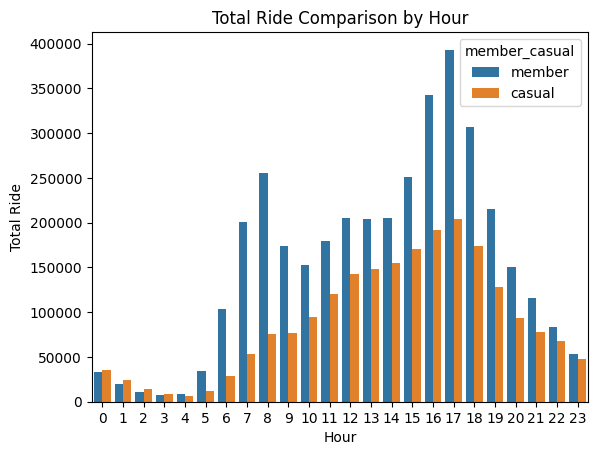

In [39]:
df["hour"] = df["started_at"].dt.hour

sns.countplot(data=df, x="hour", hue="member_casual")

plt.ylabel("Total Ride")
plt.xlabel("Hour")
plt.title("Total Ride Comparison by Hour")
plt.xticks(range(0,24))
plt.show()

From the visualization, we can see that casual user started to increased around 12:00 PM and peaked at 17:00 PM. Likewise, the number of member starts to increase at the same time. But there is something interesting, if you look at 7-8 am and 4-6 pm there is a very large increase in the number of members compared to other hours. This is in accordance with previous assumptions that members use this service to daily commute.

Now we analyze the comparison of users from day to day.

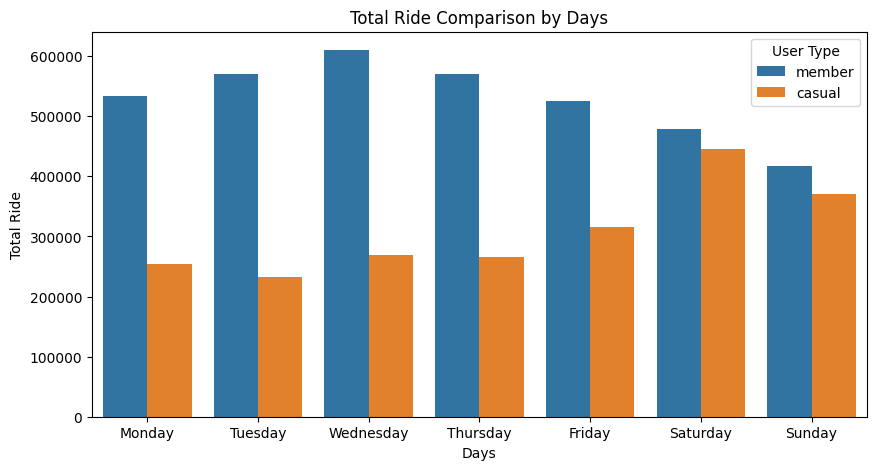

In [40]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="day_of_week", hue="member_casual", order=order)

plt.ylabel("Total Ride")
plt.xlabel("Days")
plt.title("Total Ride Comparison by Days")
plt.legend(title="User Type", loc="upper right")
plt.show()

From the visualization, we can clearly see the difference in activity patterns between members and casual riders:

1. Members tend to have a consistent number of rides during weekdays, with a decline on weekends. This reinforces the idea that members primarily use the service for commuting purposes.
2. Casual riders show lower activity on weekdays but a significant increase on weekends, indicating that they are more likely to use the service for leisure or recreational trips.

Additionally, this pattern suggests that bike-sharing demand shifts based on user type, with weekday usage being more predictable (driven by commuters) and weekend usage being more flexible (driven by casual riders exploring the city).

Now we move to the last analysis step, we compare total ride between each month to see the pattern.

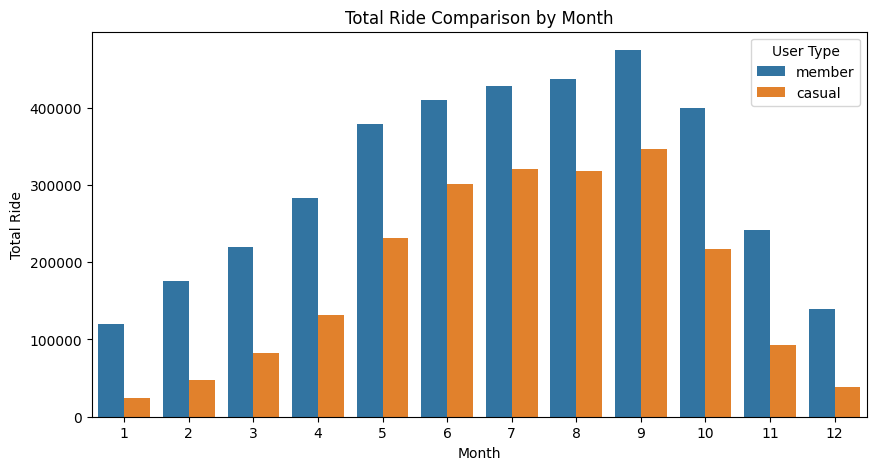

In [41]:
df["month"] = df["started_at"].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="month", hue="member_casual")

plt.ylabel("Total Ride")
plt.xlabel("Month")
plt.title("Total Ride Comparison by Month")
plt.legend(title="User Type", loc="upper right")
plt.show()

Based on the visualization, we can observe distinct seasonal trends in bike usage between members and casual riders:

1. Members consistently have a higher number of rides throughout the year, peaking in September, before gradually declining towards winter months. This suggests that members rely on the service for daily commuting, with usage being less affected by seasonal variations.
2. Casual riders show a significant increase in rides from spring to summer, peaking around June to September, before dropping sharply in colder months. This indicates that casual riders are more influenced by weather conditions, likely using the service for leisure or tourism-related activities.

This pattern reinforces the idea that bike-sharing demand is highly seasonal for casual riders but remains relatively stable for members, who use it more as a primary mode of transportation.

# STEP 5. ACT

Based on the analyze step, we can create some marketing strategies to convert casual rider to member. Here are some strategy that can be implemented:
1. Weekend Promotion for Casual Riders – Offer special discounts during weekends to encourage casual riders to subscribe for annual membership.
2. Seasonal Promotions & Discounts – Since casual riders are more active during peak months (June–September), offering limited-time discounts or promotional offers can encourage them to subscribe.
3. Bundling with Recreational Activities – Partner with local attractions, cafés, or parks to offer exclusive perks for members.
4. Push Notification on Peak Hours – We can send some notification to user in peak hours to promote annual membership. 

There are still many more marketing strategies that can be implemented to convert casual riders into annual members. We can further discuss these strategies with the marketing team to explore additional approaches tailored to different rider behaviors.

Moreover, further analysis can be conducted if additional data is available, such as daily weather conditions or a complete station dataset. This would allow us to:
- Identify key stations where casual riders frequently start their trips and target those locations for promotions.
- Analyze the impact of weather on ride patterns and offer seasonal incentives accordingly.
- Personalize marketing efforts based on user habits, making promotions more relevant and effective.

By continuously refining our strategies with data-driven insights, we can maximize membership conversions and improve user engagement.


 
